In [109]:
#Imports librairies de base
import numpy as np
import pandas as pd

#Bibliothèques pour Cross validation

#Affichage de Graphes
from IPython.display import Markdown, display, HTML
import matplotlib.pyplot as plt

#Information Mutuelle
from sklearn.feature_selection import mutual_info_regression

In [110]:
# 1.1 Charger les données d'apprentissage (Data/passagers.csv) dans un DataFrame nommé train. Afficher 10 exemples.

train = pd.read_csv("../machineLearning/machineLearning/data/Module1/passagers.csv")

train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
521,522,0,3,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S


In [111]:
# 1.2 Charger les données d'apprentissage (Data/test.csv) dans un Dataframe nommé test. Afficher 10 exemples.

test = pd.read_csv('../machineLearning/machineLearning/data/Module1/test.csv')

test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
250,1142,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S
257,1149,3,"Niklasson, Mr. Samuel",male,28.00,0,0,363611,8.0500,NaN,S
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.00,0,2,SOTON/O.Q. 3101315,13.7750,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
194,1086,2,"Drew, Master. Marshall Brines",male,8.00,0,2,28220,32.5000,NaN,S
19,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.00,0,0,2696,7.2250,NaN,C
310,1202,3,"Cacic, Mr. Jego Grga",male,18.00,0,0,315091,8.6625,NaN,S
332,1224,3,"Thomas, Mr. Tannous",male,NaN,0,0,2684,7.2250,NaN,C
265,1157,3,"Lyntakoff, Mr. Stanko",male,NaN,0,0,349235,7.8958,NaN,S
371,1263,1,"Wilson, Miss. Helen Alice",female,31.00,0,0,16966,134.5000,E39 E41,C


In [112]:
# 1.3 Afficher les informations des deux DataFrames train et Test.

train.info()

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [113]:
# 1.4 Calculer le taux global de survie

survived = train['Survived'].mean() * 100

print(round(survived, 2), "de pourcentage de survie.")


38.38 de pourcentage de survie.


In [114]:
# Question 1 : Quel travail voyez-vous pour que les données soient prêtes à faire tourner dans un modèle ?
# Retravailler les données afin de ne plus afficher des "Nan" dans les colonnes.

# Question 2 : Quelle différence y a-t-il entre les données train et les données test ?
# Il n'y a pas de colonne de survie dans les données test.

# Question 3 : Quel est le rôle de ces deux sets de données ?
# Les données du train permettent d'entrainer notre modèle test.

In [115]:
# 2.1 Analyser l'effet de la variable Classe sur le taux de survie, en affichant le % de survie par classe

survived_byclass = train.groupby(['Pclass'])['Survived'].mean() * 100

print(survived_byclass)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [116]:
# 2.2 Analyser l'effet de la variable Genre (Sex) sur le taux de survie, en affichant le % de survie par genre

survived_bysex = train.groupby(['Sex'])['Survived'].mean() * 100

print(survived_bysex)


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [117]:
# 2.3 Calculer une nouvelle colonne FamilySize contenant la taille de la famille, pour les DataFrame train et Test.
# Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et la taille de la famille.

def size_family(row):
    return row['SibSp'] + row['Parch'] + 1

train['FamilySize'] = train.apply(size_family, axis=1)
test['FamilySize'] = test.apply(size_family, axis=1)

print(train[['PassengerId', 'Name', 'Age', 'Sex', 'FamilySize']].sample(10))

     PassengerId                                   Name   Age     Sex  \
243          244          Maenpaa, Mr. Matti Alexanteri  22.0    male   
488          489          Somerton, Mr. Francis William  30.0    male   
91            92             Andreasson, Mr. Paul Edvin  20.0    male   
711          712                     Klaber, Mr. Herman   NaN    male   
516          517           Lemore, Mrs. (Amelia Milley)  34.0  female   
147          148       Ford, Miss. Robina Maggie "Ruby"   9.0  female   
109          110                    Moran, Miss. Bertha   NaN  female   
742          743  Ryerson, Miss. Susan Parker "Suzette"  21.0  female   
329          330           Hippach, Miss. Jean Gertrude  16.0  female   
15            16       Hewlett, Mrs. (Mary D Kingcome)   55.0  female   

     FamilySize  
243           1  
488           1  
91            1  
711           1  
516           1  
147           5  
109           2  
742           5  
329           2  
15            1 

In [118]:
# 2.4 Visualisez le nombre de personnes et le taux de survie par taille de famille.

survived_byfamilysize= round(train.groupby(['FamilySize'])['Survived'].mean() * 100, 2)

print(survived_byfamilysize)

FamilySize
1     30.35
2     55.28
3     57.84
4     72.41
5     20.00
6     13.64
7     33.33
8      0.00
11     0.00
Name: Survived, dtype: float64


In [119]:
# 2.5 Calculer une nouvelle colonne IsAlone indiquant si le passager est seul ou pas, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et le status IsAlone.

def is_alone(row):
    if row['FamilySize'] == 1 :
        return 1
    else :
        return 0

train['isAlone'] = train.apply(is_alone, axis=1)
test['isAlone'] = test.apply(is_alone, axis=1)

print(train[['PassengerId', 'Name', 'Age', 'Sex', 'isAlone', 'FamilySize']].sample(10))

     PassengerId                                               Name   Age  \
799          800  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...  30.0   
710          711   Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")  24.0   
602          603                          Harrington, Mr. Charles H   NaN   
279          280                   Abbott, Mrs. Stanton (Rosa Hunt)  35.0   
400          401                                 Niskanen, Mr. Juha  39.0   
15            16                   Hewlett, Mrs. (Mary D Kingcome)   55.0   
516          517                       Lemore, Mrs. (Amelia Milley)  34.0   
281          282                   Olsson, Mr. Nils Johan Goransson  28.0   
853          854                          Lines, Miss. Mary Conover  16.0   
118          119                           Baxter, Mr. Quigg Edmond  24.0   

        Sex  isAlone  FamilySize  
799  female        0           3  
710  female        1           1  
602    male        1           1  
279  female 

In [120]:
# 2.6 Visualisez le nombre de personnes et le taux de survie par statut seul ou pas.

survived_aloneOrNot = round(train.groupby(['isAlone'])['Survived'].mean() * 100, 2)

print(survived_aloneOrNot)

isAlone
0    50.56
1    30.35
Name: Survived, dtype: float64


In [121]:
# 2.7 Calculer l'information mutuelle sur les données train.
# Attention : Il y a des données continues et des données discrètes
# Ignorer les colonnes Name, Ticket et Cabin

train['Fare'].fillna(train['Fare'].median(), inplace=True)
train['Age'].fillna(train['Age'].median(), inplace=True)

df = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Pclass'])

axis = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
ordonne = df['Survived']

mutual_info = mutual_info_regression(axis, ordonne)

score = pd.Series(mutual_info, name="MI Scores", index=df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1).columns)
score = score.sort_values(ascending=False)


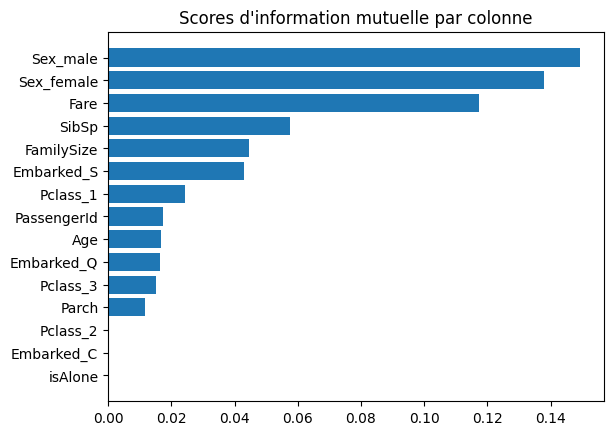

In [122]:
# 2.8 Afficher dans un graphique les scores d'information mutuelle par feature

scores = score.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Scores d'information mutuelle par colonne")
plt.show()


In [123]:
# Question 1 : La variable Classe est-elle utile pour prévoir la survie ? Pourquoi ?

# La variable classe est un bon indicateur de survie comme nous pouvons le voir sur le schéma ci-dessus. La classe 3 a plus de chance de ne pas survivre.

# Question 2 : Même question pour la variable Sex

# La variable Sex est un bon indicateur de survie comme nous pouvons le voir sur le schéma ci-dessus. Les femmes ont plus de chance de survie que les hommes.

# Question 3 : Comment traiter les variables liées à la famille du passager ?



In [124]:
# 3.1 La variable "Embarked" possède des valeurs nulles, compléter par la valeur majoritaire (S).

train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

print(train[['PassengerId', 'Name', 'Age', 'Sex', 'Embarked']].sample(10))

     PassengerId                            Name   Age     Sex Embarked
7              8  Palsson, Master. Gosta Leonard   2.0    male        S
195          196            Lurette, Miss. Elise  58.0  female        C
512          513       McGough, Mr. James Robert  36.0    male        S
517          518               Ryan, Mr. Patrick  28.0    male        Q
309          310  Francatelli, Miss. Laura Mabel  30.0  female        C
627          628   Longley, Miss. Gretchen Fiske  21.0  female        S
501          502             Canavan, Miss. Mary  21.0  female        Q
313          314          Hendekovic, Mr. Ignjac  28.0    male        S
221          222            Bracken, Mr. James H  27.0    male        S
870          871               Balkic, Mr. Cerin  26.0    male        S


In [125]:
# 3.2 Afficher l'influence du port d'embarquement sur la Survie

survived_embarked = round(train.groupby(['Embarked'])['Survived'].mean() * 100, 2)

print(survived_embarked)

Embarked
C    55.36
Q    38.96
S    33.90
Name: Survived, dtype: float64


In [126]:
# 3.3 La variable "Fare" (prix du ticket) possède des valeurs manquantes. Remplacer ces valeurs par la valeur médiane.

train['Fare'].fillna(train['Fare'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

print(train[['PassengerId', 'Name', 'Age', 'Sex', 'Fare']].sample(10))

     PassengerId                                               Name   Age  \
457          458                  Kenyon, Mrs. Frederick R (Marion)  28.0   
126          127                                McMahon, Mr. Martin  28.0   
744          745                                 Stranden, Mr. Juho  31.0   
729          730                      Ilmakangas, Miss. Pieta Sofia  25.0   
81            82                        Sheerlinck, Mr. Jan Baptist  29.0   
657          658                      Bourke, Mrs. John (Catherine)  32.0   
272          273          Mellinger, Mrs. (Elizabeth Anne Maidment)  41.0   
16            17                               Rice, Master. Eugene   2.0   
431          432  Thorneycroft, Mrs. Percival (Florence Kate White)  28.0   
613          614                                   Horgan, Mr. John  28.0   

        Sex     Fare  
457  female  51.8625  
126    male   7.7500  
744    male   7.9250  
729  female   7.9250  
81     male   9.5000  
657  female  1

In [127]:
# 3.4 Créer une variable CategoricalFare Découpant la valeur de ticket en 4 catégories de tailles à peu près égales.

train['CategoricalFare'] = pd.cut(train['Fare'], 4)
test['CategoricalFare'] = pd.cut(test['Fare'], 4)


In [128]:
# 3.5 Analyser l'effet de ces catégories de prix de ticket sur la survie.

survived_fare = round(train.groupby(['CategoricalFare'])['Survived'].mean() * 100, 2)

print(survived_fare)


CategoricalFare
(-0.512, 128.082]      36.81
(128.082, 256.165]     72.41
(256.165, 384.247]     66.67
(384.247, 512.329]    100.00
Name: Survived, dtype: float64


In [129]:
# 3.6 Combien de valeurs d'Age manquent ? Complète par des valeurs entières aléatoires entre (moyenne - écart type) et (moyenne + écart type).




In [130]:
# 3.7 Créer une variable CategoricalAge Découpant la valeur d'age en 5 catégories égales.

train['CategoricalAge'] = pd.cut(train['Age'], 5)
test['CategoricalAge'] = pd.cut(test['Age'], 5)


In [131]:
# 3.8 Analyser l'effet de ces catégories d'age sur la survie.

survived_age = round(train.groupby(['CategoricalAge'])['Survived'].mean() * 100, 2)

print(survived_age)


CategoricalAge
(0.34, 16.336]      55.00
(16.336, 32.252]    34.42
(32.252, 48.168]    40.43
(48.168, 64.084]    43.48
(64.084, 80.0]       9.09
Name: Survived, dtype: float64


In [132]:
# Question 1 : Classer les variables par ordre d'intérêt

# Class, sex , embarked, age, fare et familySize.

In [133]:
# 4.1 : Le nom permet de retrouver le titre du passager. Trouver les titres lorsqu'ils existent.

train['Titre'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Titre'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [134]:
# 4.2 : En utilisant la fonction pandas crosstab, afficher pour train le nombre d'occurrences par titres (en ligne) et par sexe (en colonne)

pd.crosstab(train['Titre'], train['Sex'])
pd.crosstab(test['Titre'], test['Sex'])


Sex,female,male
Titre,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [135]:
#4.3 : Remplacer 'Melle et 'Ms' par 'Miss'
#      Remplacer 'Mme' par 'Mrs'
# Créer une valeur "Rare" pour les autres titres avec moins de 10 occurrences.
# Calculer ensuite le taux de survie par titre

train['Titre'] = train['Titre'].replace(['Mlle', 'Ms'], 'Miss')
train['Titre'] = train['Titre'].replace('Mme', 'Mrs')

counts = train['Titre'].value_counts()

replace = counts[counts < 10].index

train['Titre'] = train['Titre'].replace(replace, 'Rare')

survived_title = round(train.groupby(['Titre'])['Survived'].mean() * 100, 2)

print(survived_title)

Titre
Master    57.50
Miss      70.27
Mr        15.67
Mrs       79.37
Rare      34.78
Name: Survived, dtype: float64


In [136]:
# 5.1 Attribuer une valeur numérique au Genre. Par exemple 0 pour 'female' et 1 pour 'male'

train['Sex'].replace(['female','male'], [0,1], inplace=True)
test['Sex'].replace(['female','male'], [0,1], inplace=True)


In [137]:
# 5.2 : Attribuer une valeur pour les possibilités de la variable "Title" ('Master','Miss','Mr','Mrs','Rare'). (Question optionnel 4 nécessaires)

mapping = {"Master" : 1, "Miss" : 2, "Mr" : 3, "Mrs" : 4, "Rare" : 5}

train['Titre'] = train['Titre'].map(mapping)
test['Titre'] = test['Titre'].map(mapping)


In [138]:
# 5.3 Remplacer les titres manquant par 0, et attribuer à la colonne le type entier. (Question optionnelle 4 nécessaires)

train['Titre'].fillna(0, inplace=True)
test['Titre'].fillna(0, inplace=True)

train['Titre'] = train['Titre'].astype(int)
test['Titre'] = test['Titre'].astype(int)


In [139]:
# 5.4 Attribuer une valeur numérique aux 4 catégories de la variable Fare (question 3.6)



In [140]:
# 5.5 Attribuer une valeur numérique au Port d'embarquement (Embarked)

mapping = {'S': 0, 'C': 1, 'Q': 2}

train['Embarked'] = train['Embarked'].map(mapping)
test['Embarked'] = test['Embarked'].map(mapping)


In [141]:
# 5.6 Supprimer les features inutiles




In [142]:
# 5.7 Afficher les infos pour les deux datasets

print(train.info)

print(test.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ... 

In [143]:
# 5.8 Sauver les deux datasets dans des fichiers csv. Éviter d'écrire un index (n° de ligne)

train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)


In [144]:
# Question : Sur combien de questions avez-vous utilisé les conseils ?

# 8 questions
